#### --------------------------------------------------------------------------------------------
### Description of the project.

##### As in this project, we have to classify the customer complains into different classes on the basis of complain content.

##### By doing this, we can handle the problems easily and customer satisfaction increases.

#### ---------------------------------------------------------------------------------------------

In [1]:
#Here we import the all important libraries.

#Linear Algebra.
import numpy as np

#Data preprocessing(read .csv and other format file).
import pandas as pd

#Data Visualization.
import matplotlib.pyplot as plt

#Statistic Visualization.
import seaborn as sns

#Regular expression.
import re

#Punctuation marks of string.
from string import punctuation

#Stopwords from corpus.
from nltk.corpus import stopwords

#Porter stemmer for stemming.
from nltk.stem.porter import PorterStemmer

#wordnet lemmatizer for lemmatization.
from nltk.stem import WordNetLemmatizer

#Word embedding(BOW and TFIDF)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Data splitting.
from sklearn.model_selection import train_test_split

#Linear classification model.
from sklearn.linear_model import LogisticRegression

#Tree classification model.
from sklearn.tree import DecisionTreeClassifier

#Model statistics.
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Model saving and loading.
import pickle

#warning handling.
import warnings

#ignore the warnings.
warnings.filterwarnings("ignore")

In [2]:
#Now here we read the dataset.

df=pd.read_csv(r"C:\sudhanshu_projects\project-task-training-course\Customer_complain_classification\complaints_processed.csv")


In [3]:
#Here we check the top records of the dataset.

df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [4]:
#As there is one unuseful column named as unnamed:0,so we remove it from dataset.

df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
#Now we again check the record of dataset.

df.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [6]:
#Now here we check the shape of the dataset.

df.shape

#The shape of dataset is (162421,2).

(162421, 2)

In [7]:
#Here we check is there any null value present in the dataset.

df.isnull().sum()

#As narrative column contain 10 null values,as they are very less in number,so we can remove it.

product       0
narrative    10
dtype: int64

In [8]:
df=df.dropna()

In [9]:
#Now we again check is there any null value in the dataset.

df.isnull().sum()

#No there is no null value present in the dataset.

product      0
narrative    0
dtype: int64

In [10]:
#Now here we check the unique values of product column.

unique=df["product"].unique()

print(f"The number of unique values in product column are: {unique}")

print()

print("The value counts of product column are: ")
print(df["product"].value_counts())
print()



# The different classes of product column are:

# ['credit_card' 'retail_banking' 'credit_reporting' 'mortgages_and_loans','debt_collection']

The number of unique values in product column are: ['credit_card' 'retail_banking' 'credit_reporting' 'mortgages_and_loans'
 'debt_collection']

The value counts of product column are: 
product
credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: count, dtype: int64



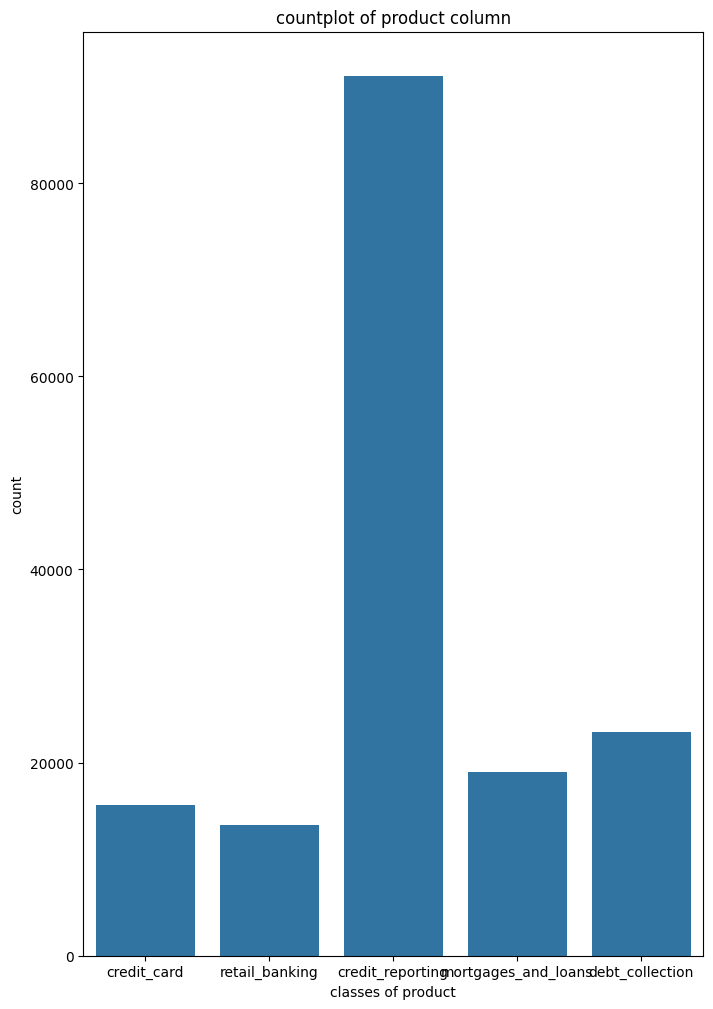

In [11]:
#Now we represent this value count in visualized manner.

plt.figure(figsize=(8,12))
sns.countplot(data=df,x="product")
plt.title("countplot of product column")
plt.xlabel("classes of product")
plt.ylabel("count")
plt.show()

In [12]:
#Now here the main task started that means to deal with text.
# ['credit_card' 'retail_banking' 'credit_reporting' 'mortgages_and_loans','debt_collection']

#Here we give the label to different classes according to this list.

df["product"]=df["product"].map({"credit_card":0,"retail_banking":1,"credit_reporting":2,"mortgages_and_loans":3,"debt_collection":4})


In [13]:
#Now here we again check the top records of the dataset.

df.head()

,product,narrative
0,0,purchase order day shipping amount receive pro...
1,0,forwarded message date tue subject please inve...
2,1,forwarded message cc sent friday pdt subject f...
3,2,payment history missing credit report speciali...
4,2,payment history missing credit report made mis...


In [14]:
#Now we preprocess the narrative column.

# #Here firstly create porterstemmer class.

# ps=PorterStemmer()

# def preprocessing(text):
#     text=re.sub('[^a-zA-Z]',' ',text)
#     text=text.lower()
#     text=text.split()
#     text=[ps.stem(word) for word in text if not word in set(stopwords.words("english"))]
#     text=" ".join(text)
#     return text

In [15]:
#Now we preprocess the narrative column.

# df["narrative"]=df["narrative"].apply(preprocessing)

In [16]:
#Here we read the narrative data.

df["narrative"][0]

'purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called 

In [17]:
#Here we decide the independent and dependent feature.

x=df["narrative"] #independent feature.

y=df["product"] #dependent feature.

In [18]:
#Now here we check the x and y.

print(x.head())

print(y.head())

0    purchase order day shipping amount receive pro...
1    forwarded message date tue subject please inve...
2    forwarded message cc sent friday pdt subject f...
3    payment history missing credit report speciali...
4    payment history missing credit report made mis...
Name: narrative, dtype: object
0    0
1    0
2    1
3    2
4    2
Name: product, dtype: int64


In [19]:
#Now here we split the dataset into train and test.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
#Here we check the shape of x_train/test and y_train/test.

print(f"The shape of x_train is: {x_train.shape}.")

print(f"The shape of x_test is: {x_test.shape}.")

print(f"The shape of y_train is: {y_train.shape}.")

print(f"The shape of y_test is: {y_test.shape}.")

The shape of x_train is: (129928,).
The shape of x_test is: (32483,).
The shape of y_train is: (129928,).
The shape of y_test is: (32483,).


In [21]:
#Now here we create the object of tfidf vectorizer.

tf=TfidfVectorizer()

x_train=tf.fit_transform(x_train)

x_test=tf.transform(x_test)

In [22]:
#Now here we check the shape of x_train and x_test after vectorization.

print(f"The shape of x_train after embedding is: {x_train.shape}.")

print(f"The shape of x_test after embedding is: {x_test.shape}.")

The shape of x_train after embedding is: (129928, 41937).
The shape of x_test after embedding is: (32483, 41937).


In [23]:
#Now here we apply linear classification model.

lor=LogisticRegression()

lor.fit(x_train,y_train)

LogisticRegression()

In [24]:
#Here we find the train and test accuracy.

y_pred_train=lor.predict(x_train)

y_pred_test=lor.predict(x_test)

train_ac=accuracy_score(y_train,y_pred_train)

test_ac=accuracy_score(y_test,y_pred_test)

print(f"The train accuracy of lor model is: {train_ac}.")

print(f"The test accuracy of lor model is: {test_ac}.")

The train accuracy of lor model is: 0.8932639615787206.
The test accuracy of lor model is: 0.8738724871471231.


#### ---------------------------------------------------------------------------------------------
### Conclusion of lor model.

##### The train accuracy is 89.32% and test accuracy is 87.38%.

#### -----------------------------------------------------------------------------------------------

In [25]:
#Now we apply the decision tree classifier.

dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
#Here we find the train and test accuracy.

y_pred_train_dtc=dtc.predict(x_train)

y_pred_test_dtc=dtc.predict(x_test)

acc_train_dtc = accuracy_score(y_train,y_pred_train_dtc)

acc_test_dtc = accuracy_score(y_test,y_pred_test_dtc)

print(f"The train accuracy of dtc model is: {acc_train_dtc}.")

print(f"The test accuracy of dtc model is: {acc_test_dtc}.")

The train accuracy of dtc model is: 0.9957591897050674.
The test accuracy of dtc model is: 0.8189514515284918.


In [27]:
#As the difference between the bias and variance is very high,so we not take this model. 

In [28]:
#Now here we save the model and vectorizer.

pickle.dump(tf,open(r"C:\sudhanshu_projects\project-task-training-course\Customer_complain_classification\vectorizer.pkl","wb"))

pickle.dump(lor,open(r"C:\sudhanshu_projects\project-task-training-course\Customer_complain_classification\customer_complain_classification.pkl","wb"))

In [29]:
#Here we load the saved model and vectorizer.

vectorizer = pickle.load(open(r"C:\sudhanshu_projects\project-task-training-course\Customer_complain_classification\vectorizer.pkl","rb"))

model = pickle.load(open(r"C:\sudhanshu_projects\project-task-training-course\Customer_complain_classification\customer_complain_classification.pkl","rb"))

In [42]:
#Now here we test the model.

# ['credit_card' 'retail_banking' 'credit_reporting' 'mortgages_and_loans','debt_collection']

input_df=input("enter the narration: ")

input_df=tf.transform([input_df])

prediction=model.predict(input_df)[0]

print("\n\n")

if prediction==0:
    print("Credit_card Problem")
elif prediction==1:
    print("retail_banking")
elif prediction==2:
    print("credit_reporting")
elif prediction==3:
    print("mortgages_and_loans")
else:
    print("debt_collection")

enter the narration:  current loan provident funding applied refinance provident funding variable interest rate went loan applied refinance downpayment reduce depth also monthly payment locked interest rate day current payment going approximately provided income debt information provident funding provident funding play game interest rate arm went provided every information suspended loan application able reach mortgage broker always get voicemail responded email underwriter approving due ratio





mortgages_and_loans


In [39]:
df.iloc[15:18,:].values

# df.columns

array([[3,
        'current loan provident funding applied refinance provident funding variable interest rate went loan applied refinance downpayment reduce depth also monthly payment locked interest rate day current payment going approximately provided income debt information provident funding provident funding play game interest rate arm went provided every information suspended loan application able reach mortgage broker always get voicemail responded email underwriter approving due ratio'],
       [3,
        'current loan got deferment paid back credit history yet lost job due covid therefore asking original bank ally lower rate allow lower payment every bank offering applied full page document today still reply called time portal representative tell use work call get told need one piece documentation time refuse allow speak even email underwriter yet applying original mortgage one dedicated rep could communicate rep told yes document would word within day waited till called told 